# COVID-19 Modelo Basado en Síntomas

Estos datos ayudarán a identificar si alguna persona tiene una enfermedad por coronavirus o no en función de algunos síntomas definidos. Estos síntomas se basan en las pautas dadas por la Organización Mundial de la Salud (OMS).

El conjunto de datos contiene **siete variables**
A continuación se muestra la descripción de cada variable:
- País: Lista de países visitados por la persona.
- Edad: Clasificación del grupo de edad para cada persona, según el estándar de grupos de edad de la OMS.
- Síntomas: fiebre, cansancio, dificultad para respirar, tos seca y dolor de garganta.
- Experimente cualquier otro síntoma: dolores, congestión nasal, secreción nasal, diarrea y otros.
- Gravedad: leve, moderada, grave
- Contacto: ¿La persona se ha puesto en contacto con algún otro paciente de COVID-19?

Tenemos dos dos archivos CSV de datos:

- Raw-Data: Este archivo contiene todas las posibles etiquetas categóricas de variables. Se utiliza para generar los datos limpios.
- Datos limpios: Este archivo contiene todas las combinaciones posibles de datos de Raw-Data.csv, que se pueden utilizar para el análisis. La mayoría de las celdas contienen variables 0 y 1 dependiendo si la característica es positiva o no.

In [1]:
# Librerías necesarias

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Los archivos de datos están disponibles en el directorio "../input/" 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv
/kaggle/input/covid19-symptoms-checker/Raw-Data.csv


En esta celda cargamos el archivo Cleaned-Data.csv, contiene información de cada paciente.

Mostramos las primeras 5 filas del conjunto de datos

In [2]:
df = pd.read_csv("/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv")
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


Mostramos las últimas 5 filas del conjunto de datos

In [3]:
df.tail()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other
316799,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,Other


Imprimimos el número del conjunto de datos que tenemos. En este caso enocntramos un **316800 instancias de diferentes pacientes y 27 características de entrada** para cada paciente.

In [4]:
print("Tamaño del dataset", df.shape)
print("Filas:",df.shape[0],"\nColumnas:",df.shape[1])

Tamaño del dataset (316800, 27)
Filas: 316800 
Columnas: 27


Miramos que número de pacientes presentaron ninguna severidad -> 79200

In [5]:
df['Severity_None'].value_counts()

0    237600
1     79200
Name: Severity_None, dtype: int64

Miramos que número de pacientes presentaron severidad suave

In [6]:
df['Severity_Mild'].value_counts()

0    237600
1     79200
Name: Severity_Mild, dtype: int64

El número de pacientes que presentaron severidad moderada-> 79200

In [7]:
df['Severity_Moderate'].value_counts()

0    237600
1     79200
Name: Severity_Moderate, dtype: int64

Número de pacientes presentaron severidad severa -> 79200

In [8]:
df['Severity_Severe'].value_counts()

0    237600
1     79200
Name: Severity_Severe, dtype: int64

OBSERVAMOS QUE TENEMOS LAS CARACTERÍSTICAS REGULADAS EN EL NÚMERO. TENEMOS DATOS DE TODAS LAS ETIQUETAS.

Primero vamos a realizar un análisis de los datos (Exploratory Data Analysis o EDA).

Para comenzar controlamos el total de los valores nulos de las celdas.

In [9]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

Como no tenemos ningún valor nulo, no realizamos ningún cambio inicial de los datos

Comprobamos que tenemos todas las características como enteros 0 o 1 dependiendo si el paciente presenta esa sintomatología o no.
La única característica que no corresponde con un valor entero es Country.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

Comprobamos todos los valores que toma la característica Country

In [11]:
print("Número de valores que toma la característica Country ->")
df['Country'].unique()

Número de valores que toma la característica Country ->


array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

Podemos pensar que esta característica no va a ser la más importante de entre las que tenemos. Vamos a quitarla de nuestro conjunto de datos

In [12]:
df.drop("Country",axis=1,inplace=True)

In [13]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Realizamos un histograma para cada característica. De esta manera podemos comprobar el número de pacientes que han tenido síntomas como fiebre, cansancio o dificultad para respirar.

También podemos mirar los rangos de edad de los pacientes o su género.

array([[<AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Tiredness'}>,
        <AxesSubplot:title={'center':'Dry-Cough'}>,
        <AxesSubplot:title={'center':'Difficulty-in-Breathing'}>,
        <AxesSubplot:title={'center':'Sore-Throat'}>],
       [<AxesSubplot:title={'center':'None_Sympton'}>,
        <AxesSubplot:title={'center':'Pains'}>,
        <AxesSubplot:title={'center':'Nasal-Congestion'}>,
        <AxesSubplot:title={'center':'Runny-Nose'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>],
       [<AxesSubplot:title={'center':'None_Experiencing'}>,
        <AxesSubplot:title={'center':'Age_0-9'}>,
        <AxesSubplot:title={'center':'Age_10-19'}>,
        <AxesSubplot:title={'center':'Age_20-24'}>,
        <AxesSubplot:title={'center':'Age_25-59'}>],
       [<AxesSubplot:title={'center':'Age_60+'}>,
        <AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'cent

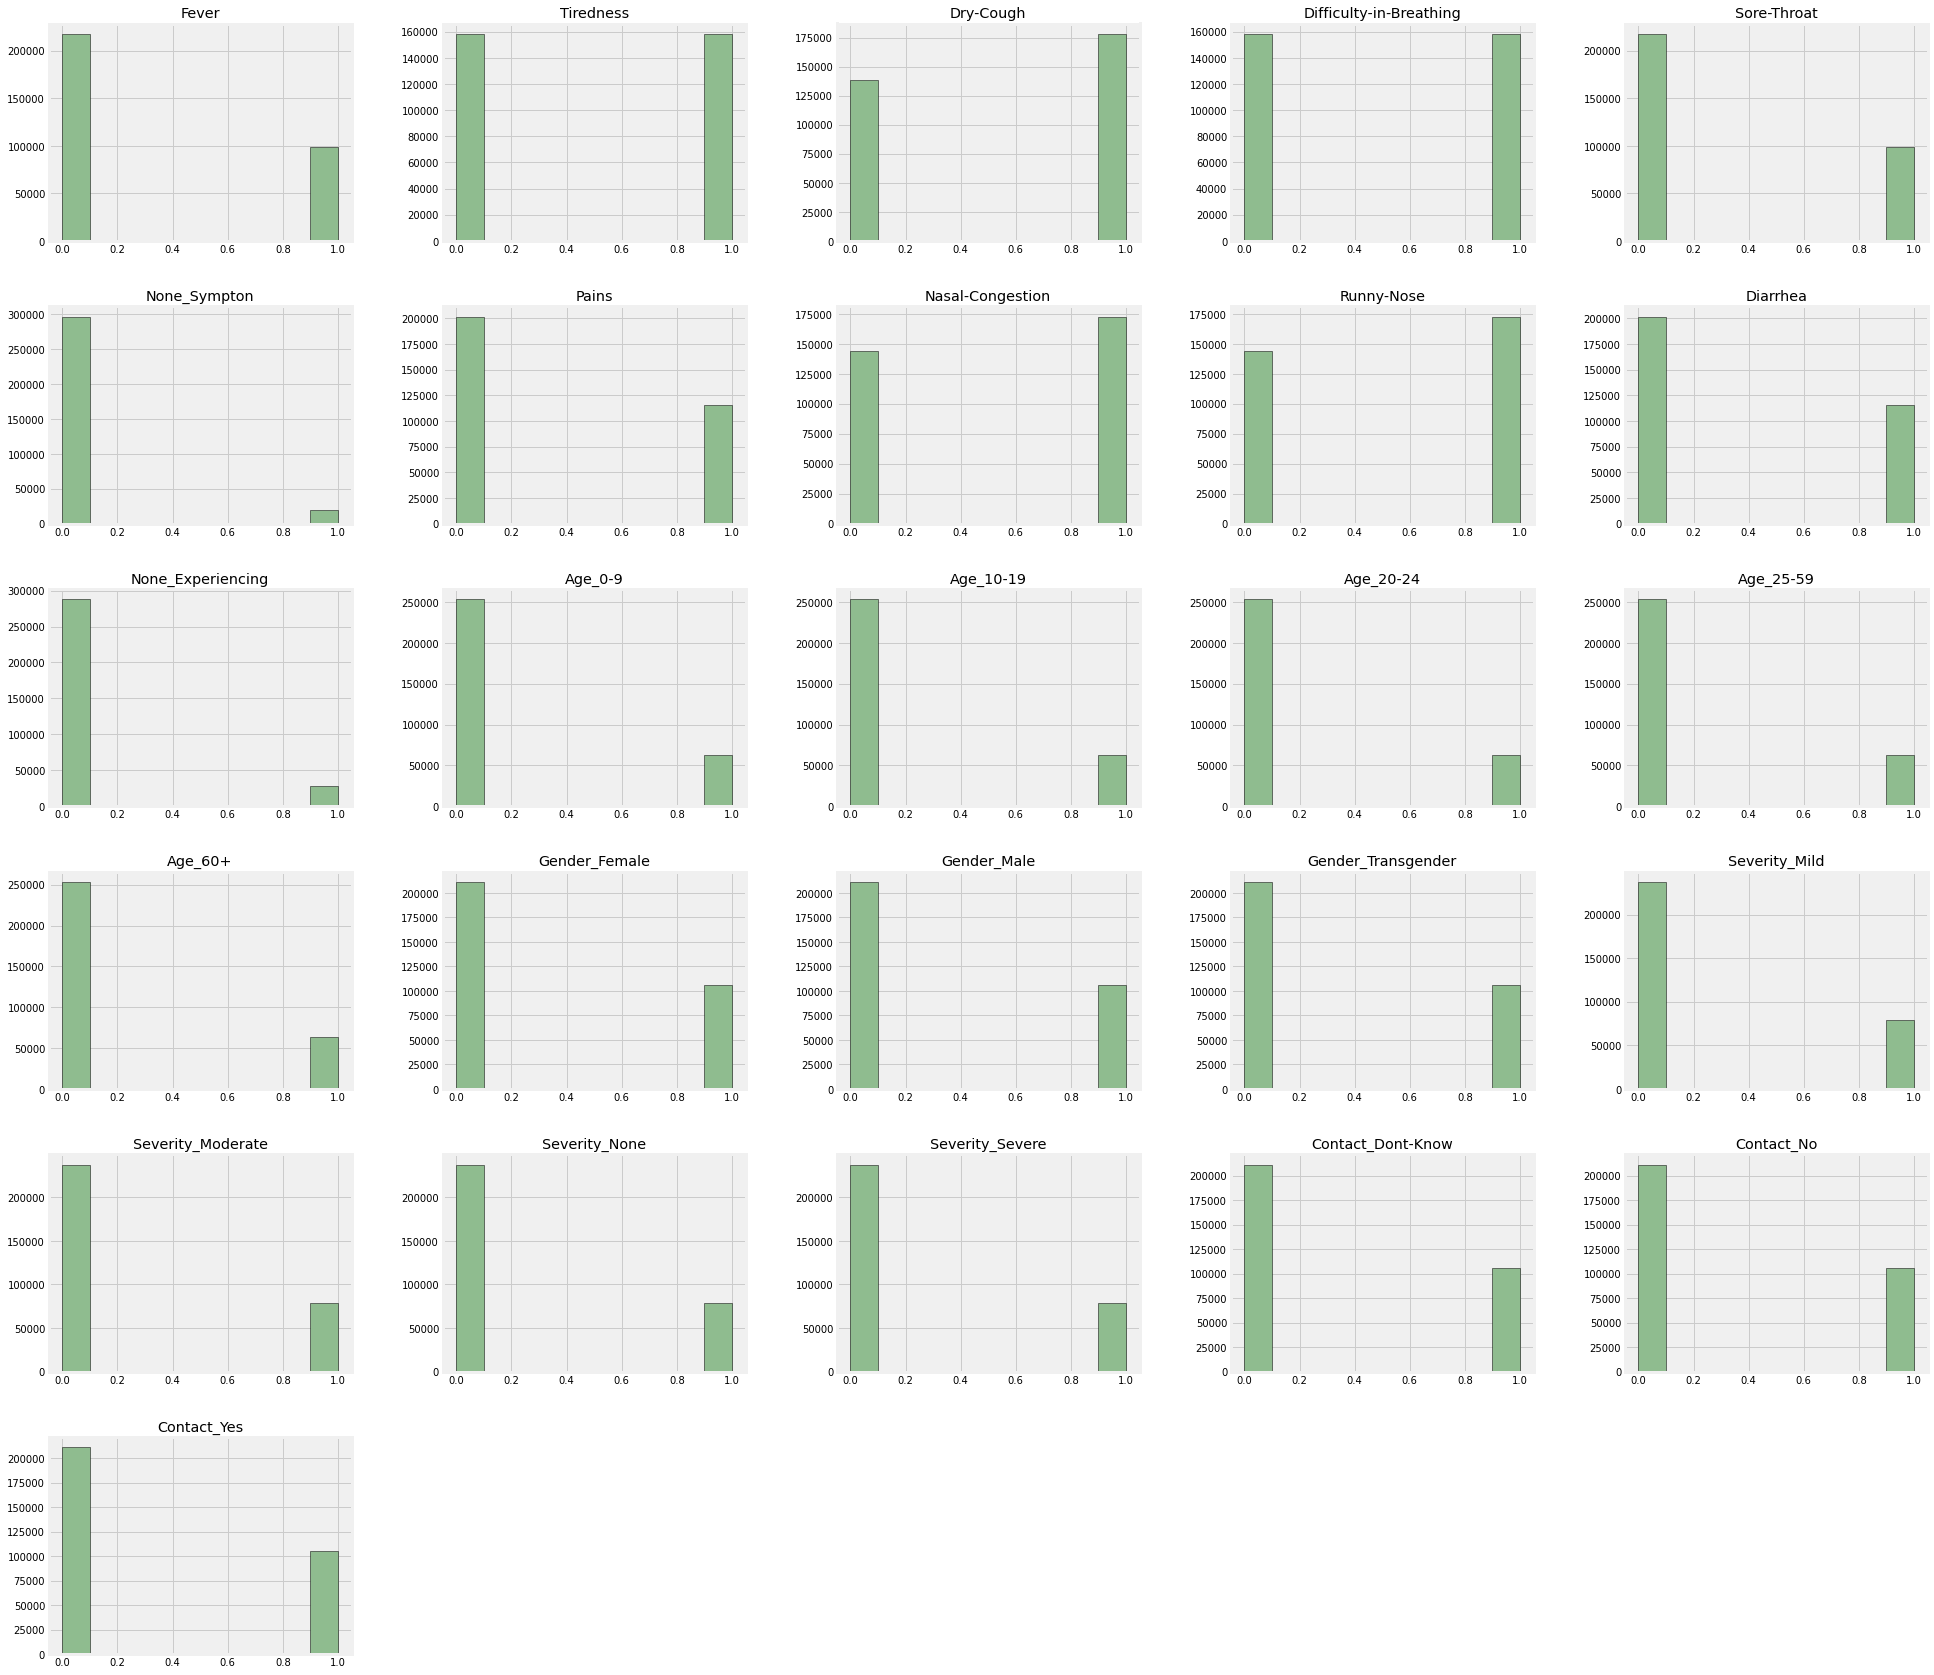

In [14]:
df.hist(figsize=(30,30), edgecolor='black', color='darkseagreen')

Realizamos un filtro para separar la severidad:
- Solo puedes estar en None, Mild, Moderate y Severe 
- El resto se pondrán a 'No'

In [15]:
severity_columns = df.filter(like='Severity_').columns

In [16]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

Aplicamos a todas las columnas que empiezen por Severity_ (filtro) las condiciones anteriores

In [17]:
df['Condition']=df[severity_columns].values.tolist()

En nuestro dataframe tenemos una nueva condición que especifica el valor categórico de la severidad

In [18]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,"[Mild, No, No, No]"
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,"[Mild, No, No, No]"
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,"[Mild, No, No, No]"
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,"[No, Moderate, No, No]"
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,"[No, Moderate, No, No]"


Aún tenemos que quitar los valores añadidos de 'No'. Creamos una función para esto y la aplicamos

In [19]:
def remove(lista):
    lista = set(lista) 
    lista.discard("No")
    final = ''.join(lista)
    return final

In [20]:
df['Condition'] = df['Condition'].apply(remove)

Finalmente nos queda en la variable 'Condition' el valor de la severidad. Que será nuestra característica de salida del modelo

In [21]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,Moderate


<AxesSubplot:xlabel='Condition', ylabel='count'>

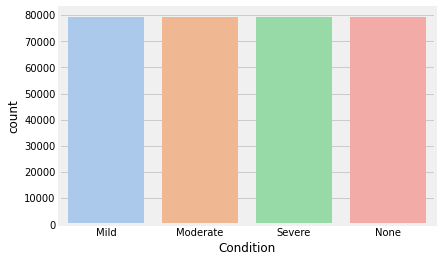

In [22]:
sns.countplot(df['Condition'], palette="pastel")

Ahora vamos a realizar el mismo procedimiento para agrupar características en la edad, género y tipo de contacto

In [23]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

Creamos una categoría para la edad, otra para el género y otra para el contacto en la que la severidad sea nula
- Sin riesgo por la edad
- Sin riesgo por el género
- Sin riesgo por el tipo de contacto

In [24]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

Creamos otras tres para discernir entre Severity_Mild (severidad suave):
- Con riesgo suave por la edad
- Ccon riesgo suave por el género
- Con riesgo suave por el tipo de contacto

In [25]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

Separar entre Severity_Moderate (severidad moderada):
- Con riesgo moderado por la edad
- Ccon riesgo moderado por el género
- Con riesgo moderado por el tipo de contacto

In [26]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

Separar entre Severity_Severe (severidad severa):
- Con riesgo severo por la edad
- Ccon riesgo severo por el género
- Con riesgo severo por el tipo de contacto

In [27]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

Como la característica importante Condition con valores None, Mild, Moderate y Severe ya la tenemos guardada en una única variable de salida; vamos a borrar las otras 4 columnas que no necesitamos
- Severity_Mild 
- Severity_None
- Severity_Moderate
- Severity_Severe

In [28]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,...,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,1,0,No,Moderate,No,No,0,1,0,Moderate


In [29]:
df.drop(severity_columns,axis=1,inplace=True)

En el preprocesado de datos ya hemos eliminado varias columnas.
Ahora vamos a tranformar la variable categórica (Mild,None, Moderate y Severe) con la librería LabelEncoder en una variable numérica

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

Tomará el valor 0,1,2,3

**0-None
1-Mild
2-Moderate
3-Severe**

In [31]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,3
316796,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,3
316797,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2
316798,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,2


Por último , vamos a mirar la correlación entre caracterísiticas con un heatmap.

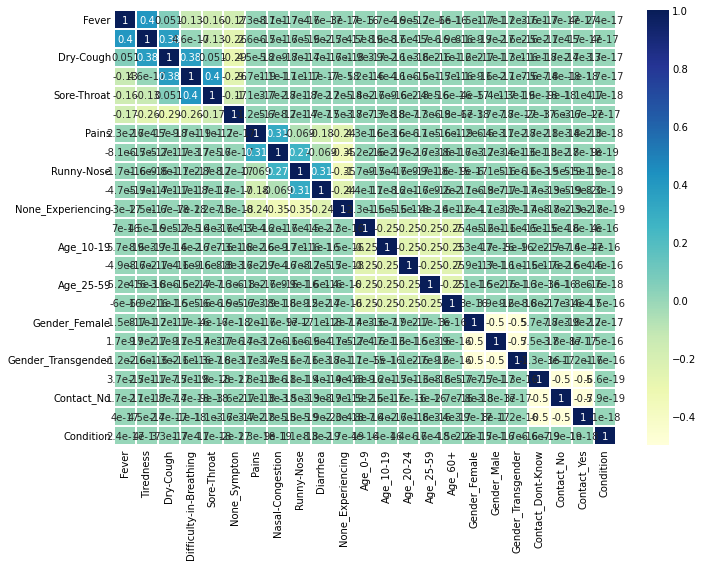

In [32]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=0.4) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**ENTRENAMIENTO**

En el conjunto de las características de entrada tenemos que eliminar la etqueta de salida. Además quitamos otras columnas que creemos que no son necesarias.

La etiqueta de salida la guardamos en la variable y

In [33]:
X= df.drop(['Condition', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes' ],axis=1)
y= df['Condition']

Dividimos el conjunto de datos en test y entrenamiento

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
print("Tamaño de X_train",X_train.shape)
print("Tamaño de Y_train",y_train.shape)
print("Tamaño de X_test",X_test.shape)
print("Tamaño de Y_est", y_test.shape)

Tamaño de X_train (221760, 11)
Tamaño de Y_train (221760,)
Tamaño de X_test (95040, 11)
Tamaño de Y_est (95040,)


Esta función nos sirve para devolver la lista ordenada de forma aleatoria

In [36]:
X_train.sample(frac=1)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing
77729,0,0,0,1,1,0,0,0,0,1,0
9026,1,0,0,0,0,0,0,1,1,1,0
312162,0,0,0,1,1,0,0,0,0,1,0
171121,1,1,1,1,1,0,0,1,1,1,0
70259,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
191174,0,1,0,0,0,0,1,0,0,0,0
269675,0,0,1,1,0,0,0,0,0,0,1
207429,1,1,0,0,0,0,0,1,1,1,0
265251,0,0,1,1,1,0,0,1,1,0,0


Importamos las librerías necesarias de deep learning

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import models 
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical

Conertimos la característica de salida que podría tomar el valor 0,1,2,3 a un vector con el valor 1 que representa la etiqueta y el resto a 0

In [38]:
y_train = to_categorical(y_train, num_classes = 4)
y_train.shape

(221760, 4)

In [39]:
y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(95040, 4)

In [40]:
y_test

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

Definimos nuestro modelo con las siguientes layers

In [41]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(units= 32, input_shape=(11,),activation='relu'))
model.add(keras.layers.Dense(units= 64,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units= 128,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units= 32,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units= 16,activation='relu'))
model.add(keras.layers.Dense(units= 8,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Comprobamos cual es el resumen de las capas de nuestro modelo

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4

Añadimos como función de pérdida categorical_crossentropy

También añadimos como función de optimización Gradient Descent

Finalmente queremos obtener como métrica el accuracy del problema.

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Entrenamos nuestro modelo pasándole el conjunto de características de entramiento y la salida final.

In [44]:
model.fit(X_train, y_train, epochs=40, batch_size=64, verbose=2, validation_data=(X_test, y_test))

2021-12-08 15:12:41.747961: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
3465/3465 - 18s - loss: 1.3903 - accuracy: 0.2486 - val_loss: 1.3869 - val_accuracy: 0.2502
Epoch 2/40
3465/3465 - 17s - loss: 1.3865 - accuracy: 0.2498 - val_loss: 1.3864 - val_accuracy: 0.2513
Epoch 3/40
3465/3465 - 17s - loss: 1.3864 - accuracy: 0.2502 - val_loss: 1.3865 - val_accuracy: 0.2490
Epoch 4/40
3465/3465 - 17s - loss: 1.3863 - accuracy: 0.2506 - val_loss: 1.3863 - val_accuracy: 0.2514
Epoch 5/40
3465/3465 - 16s - loss: 1.3864 - accuracy: 0.2488 - val_loss: 1.3863 - val_accuracy: 0.2491
Epoch 6/40
3465/3465 - 16s - loss: 1.3863 - accuracy: 0.2503 - val_loss: 1.3864 - val_accuracy: 0.2491
Epoch 7/40
3465/3465 - 16s - loss: 1.3864 - accuracy: 0.2489 - val_loss: 1.3863 - val_accuracy: 0.2514
Epoch 8/40
3465/3465 - 16s - loss: 1.3864 - accuracy: 0.2503 - val_loss: 1.3863 - val_accuracy: 0.2504
Epoch 9/40
3465/3465 - 17s - loss: 1.3864 - accuracy: 0.2502 - val_loss: 1.3864 - val_accuracy: 0.2504
Epoch 10/40
3465/3465 - 18s - loss: 1.3864 - accuracy: 0.2498 - val_loss:

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred = np.argmax(y_pred,axis=1)

In [47]:
y_pred

array([3, 3, 3, ..., 3, 3, 3])